<a href="https://colab.research.google.com/github/AlvarezLI/Python-Prep/blob/main/ProyectoDS_ParteI_Alvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
df = pd.read_csv('inetflix_titles.csv',encoding='latin-1',delimiter = ';', engine='python')



<Figure size 1200x800 with 0 Axes>

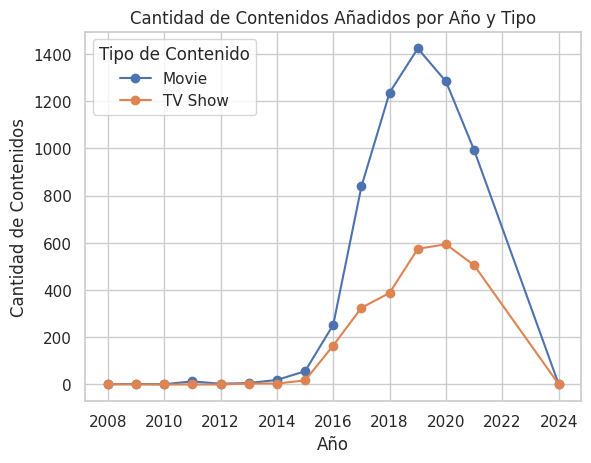

In [4]:
df['fecha_agregado'] = pd.to_datetime(df['date_added'], errors='coerce')
# Creo columna 'año_agregado'
df['año_agregado'] = df['fecha_agregado'].dt.year

# Filtro los datos por tipo de contenido y año
contenido_por_año = df.groupby(['año_agregado', 'type']).size().unstack(fill_value=0)

# Creo gráfico de líneas
plt.figure(figsize=(12, 8))
contenido_por_año.plot(kind='line', marker='o')
plt.title('Cantidad de Contenidos Añadidos por Año y Tipo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Contenidos')
plt.legend(title='Tipo de Contenido')
plt.grid(True)
plt.show()


Distribución de Tipos de Contenidos:

¿Cuál es la proporción de películas y programas de TV en el catálogo de Netflix?

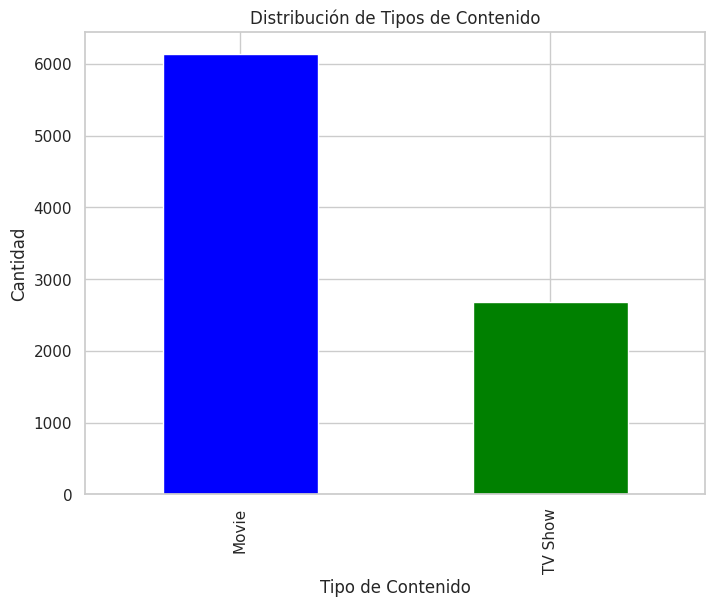

In [20]:
# Visualización de la distribución de tipos de contenido
colores = ['blue', 'green']
conteo_tipos = df['type'].value_counts()
ax = conteo_tipos.plot(kind='bar', color=colores, figsize=(8, 6))
plt.title('Distribución de Tipos de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()

Duración y Rating de Contenidos:

¿Cuál es la duración promedio de las películas y el número promedio de temporadas de los programas de TV?

Duración promedio de películas: 99.53


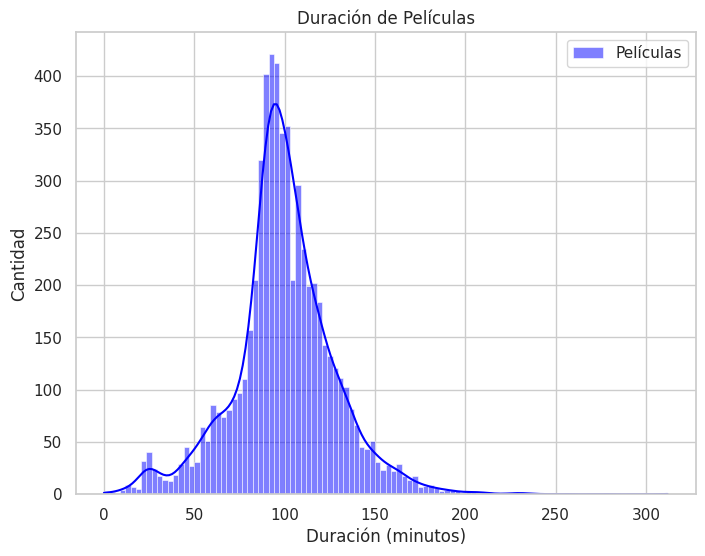

In [19]:

# Convertir la duración en formato numérico exclusivamente en minutos
df['duracion_minutos'] = df['duration'].apply(lambda x: int(str(x).split(' ')[0]) if 'min' in str(x) else 0)
peliculas = df[df['type'] == 'Movie']
series = df[df['type'] == 'TV Show']
print("Duración promedio de películas: {:.2f}".format(peliculas['duracion_minutos'].mean()))
plt.figure(figsize=(8, 6))
sns.histplot(peliculas['duracion_minutos'], kde=True, color='blue', label='Películas')
plt.title('Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad')
plt.legend()
plt.show()


Tendencias de Adición de Contenido:

¿Cómo ha variado la cantidad de contenido agregado a lo largo de los años?

<ipython-input-18-5d7fa1530199>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='año_agregado', palette='viridis', order=sorted(df['año_agregado'].dropna().unique()))


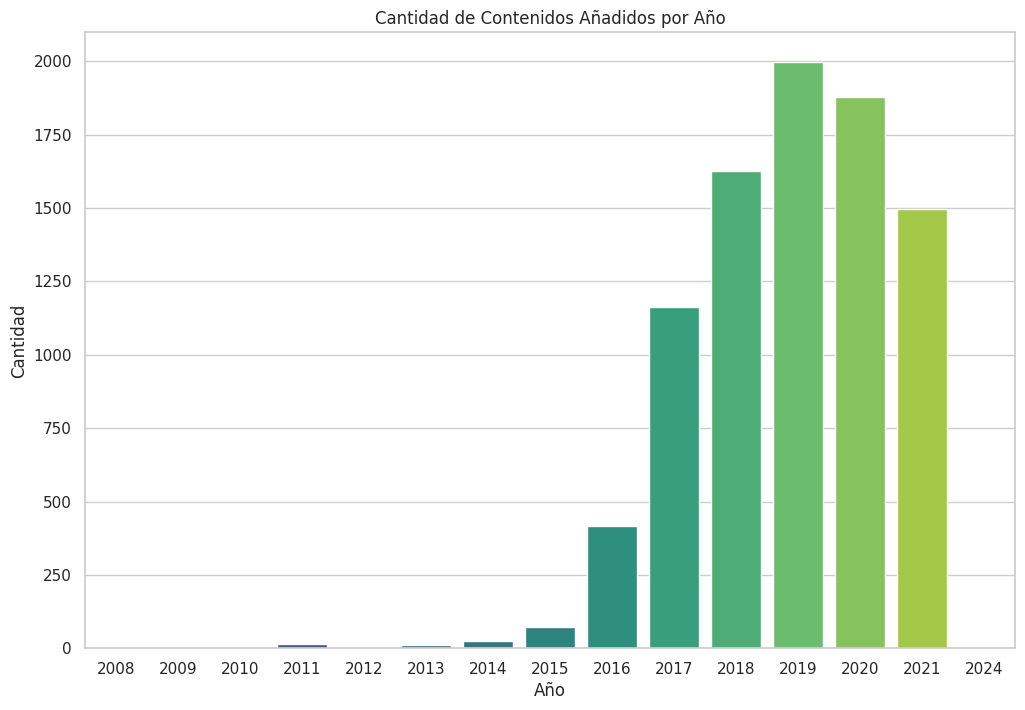

In [18]:
df['fecha_agregado'] = pd.to_datetime(df['date_added'], errors='coerce')
df['año_agregado'] = df['fecha_agregado'].dt.year.astype('Int64')
df['mes_agregado'] = df['fecha_agregado'].dt.to_period('M')
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='año_agregado', palette='viridis', order=sorted(df['año_agregado'].dropna().unique()))
plt.title('Cantidad de Contenidos Añadidos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()


Identificación de Valores Perdidos


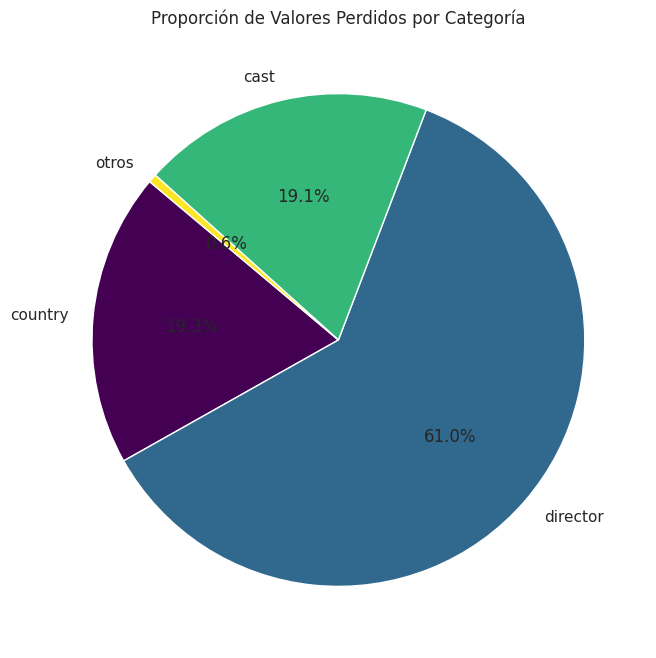

Valores perdidos en cada categoría:
 type               1
title              1
director        2635
cast             826
country          832
date_added        11
release_year       1
rating             5
duration           4
listed_in          1
dtype: int64


In [17]:

valores_perdidos = df.isnull().sum()

# filtro columnas con valores perdidos excluyendo 'fecha_agregado', 'año_agregado' y 'mes_agregado'
valores_perdidos = valores_perdidos[(valores_perdidos > 0) & (valores_perdidos.index != 'fecha_agregado') & (valores_perdidos.index != 'año_agregado') & (valores_perdidos.index != 'mes_agregado')]
categorias_principales = ['country', 'director', 'cast']
valores_perdidos_por_categoria = {'country': 0, 'director': 0, 'cast': 0, 'otros': 0}

for columna in valores_perdidos.index:
    if columna in categorias_principales:
        valores_perdidos_por_categoria[columna] += valores_perdidos[columna]
    else:
        valores_perdidos_por_categoria['otros'] += valores_perdidos[columna]

categorias = list(valores_perdidos_por_categoria.keys())
valores = list(valores_perdidos_por_categoria.values())

plt.figure(figsize=(10, 8))
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(categorias))))
plt.title('Proporción de Valores Perdidos por Categoría')
plt.show()
print("Valores perdidos en cada categoría:\n", valores_perdidos)